In [18]:
import json

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from tqdm import tqdm

In [54]:
data = pd.read_csv('data/train.csv')
data.sample(10)

,id,source,sentence_1,sentence_2,label,binary-label
5429,boostcamp-sts-v1-train-5429,nsmc-rtt,화재가 발생했을때 온도가 몇도인지 궁금한가?,불이 났을 때 온도가 몇 도인지 궁금하십니까?,3.8,1.0
5433,boostcamp-sts-v1-train-5433,slack-rtt,월요일에 또 뵐텐데 이번 주에도 시간 내주셔서 감사합니다~!!,월요일에 또 뵙겠지만 이번주도 시간 내주셔서 감사합니다~!!,4.8,1.0
636,boostcamp-sts-v1-train-636,nsmc-sampled,통쾌하고 시원하다!,간만에 통쾌하게 웃었네,3.0,1.0
6348,boostcamp-sts-v1-train-6348,slack-sampled,우린 이런 식의 질문에 익숙해져 있다.,대부분의 삶은 이런 것들이 혼재되어 있다.,0.0,0.0
8142,boostcamp-sts-v1-train-8142,nsmc-sampled,정말 열나게 재미없다..,정말 재미없다...,3.6,1.0
2163,boostcamp-sts-v1-train-2163,nsmc-sampled,진짜 tv 전기세가 아까웠다!!,tv 전기세가 아깝다!!!,4.0,1.0
903,boostcamp-sts-v1-train-903,nsmc-sampled,수작이네 이정도면 ㄷㄷ,이정도면 충분히 수작임,3.8,1.0
2381,boostcamp-sts-v1-train-2381,slack-sampled,워크샵도 여기서 하면 좋을 것 같군요!,저런 곳에서 리모트하면 넘 좋을 것 같아요!!,0.8,0.0
4876,boostcamp-sts-v1-train-4876,slack-sampled,다수결의 원칙을 따라 예약할 예정이니 투표 부탁드립니다!,미팅 결과 2가지 부분에 대해서는 투표로 방향성을 정해야 할 것 같아 투표 부탁드려요!,2.6,1.0
3379,boostcamp-sts-v1-train-3379,slack-rtt,유산균만 넣어주면 요거트로..?,요거트에 유산균만 넣으면...?,2.2,0.0


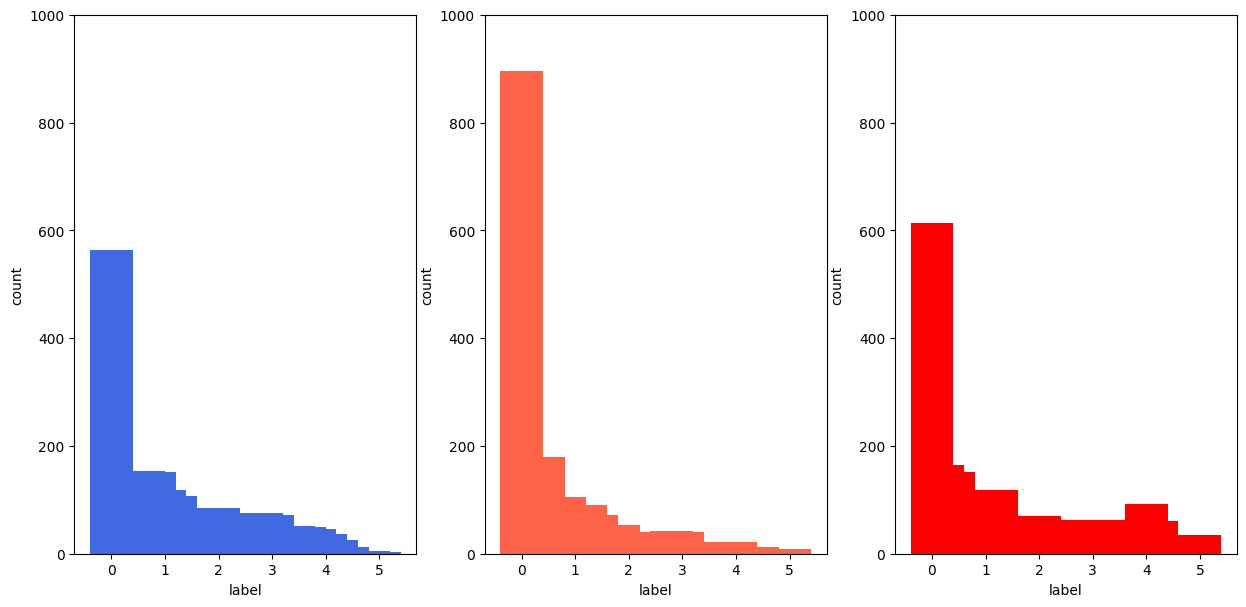

In [80]:
gb_source = data.groupby('source')['label'].value_counts()
fig, axes = plt.subplots(1, 3, figsize=(15, 7))
axes[0].bar(gb_source['nsmc-sampled'].index, gb_source['nsmc-sampled'], color='royalblue')
axes[1].bar(gb_source['slack-sampled'].index, gb_source['slack-sampled'], color='tomato')
axes[2].bar(gb_source['petition-sampled'].index, gb_source['petition-sampled'], color='red')
for ax in axes:
    ax.set_ylim(0,1000)
    ax.set_xlabel('label')
    ax.set_ylabel('count')
plt.show()

In [75]:
label_0_all = data[data['label'] == 0]
display(label_0_all)

,id,source,sentence_1,sentence_2,label,binary-label
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,0.0,0.0
14,boostcamp-sts-v1-train-014,slack-sampled,아래는 게임 내에서 함께 팀을 맺고 캡쳐한 이미지입니다.,여러분들간의 다양한 아이디어를 제안하고 나누는 채널입니다.,0.0,0.0
19,boostcamp-sts-v1-train-019,petition-sampled,내년 러시아월드컵 자진포기 청원드립니다.,2023 아시안컵 유치에 공동개최를 반대 합니다.,0.0,0.0
20,boostcamp-sts-v1-train-020,slack-sampled,앞머리 새로 하셨습니다. ^^,가방에 넣어 다니면서 조금씩 먹습니다. ^^,0.0,0.0
22,boostcamp-sts-v1-train-022,slack-sampled,답답할 때 보면 속이 뻥 뚫릴 것 같아요,양보단 한입 먹는 순간 고삐 풀릴 것 같아요 ㅋㅋㅋ,0.0,0.0
...,...,...,...,...,...,...
9274,boostcamp-sts-v1-train-9274,nsmc-sampled,영화괜찮았구만 난리들이네 -_-,대만박스오피스 1위 대만 클라스 보소 -_-;;,0.0,0.0
9278,boostcamp-sts-v1-train-9278,petition-sampled,대한민국 정치인이 참~~~,조국아~~~조국아~~~나의 조국아~~~,0.0,0.0
9308,boostcamp-sts-v1-train-9308,slack-sampled,베이비 필터 끼우고 찍어봤습니당.,넘넘 반가웠습니당.,0.0,0.0
9313,boostcamp-sts-v1-train-9313,nsmc-sampled,엘호야때문에보긴하지만...루즈한감있습니다..,..글쎄다...쇼킹하긴하지만 노골적으로 할필요까진..;; 엽기적이다.,0.0,0.0


In [70]:
label_0 = data[data['label'] == 0].sample(n=1000)
label_n = data[data['label'] != 0]
new_data = pd.concat([label_0, label_n])
display(new_data)

,id,source,sentence_1,sentence_2,label,binary-label
4697,boostcamp-sts-v1-train-4697,petition-sampled,재수생전형을 만들어주십쇼!!!,전철연 ( 전국철거민연합회 ) 의 횡포 를 막아주세요 !!!!!!!!!!!!!!!!...,0.0,0.0
7036,boostcamp-sts-v1-train-7036,slack-sampled,진짜 빨리 써주셨네요 ㅎㅎ,도움을 주시면 더더욱 감사합니다 ㅎㅎ ),0.0,0.0
8082,boostcamp-sts-v1-train-8082,slack-sampled,이런것은 정말 멋진 기획이네요.,넘 멋진 비유입니다,0.0,0.0
6002,boostcamp-sts-v1-train-6002,slack-sampled,넘넘 재밌었습니당~~!!,마치 인삼같습니닷..,0.0,0.0
7117,boostcamp-sts-v1-train-7117,nsmc-sampled,"매우매우 재미있음,.,,,","평점왜저래높노,,,,,",0.0,0.0
...,...,...,...,...,...,...
9319,boostcamp-sts-v1-train-9319,petition-sampled,교원능력개발평가에서 교원이 보호받을 수 있는 장치를 마련해야합니다,본인이 납부한 국민연금 금액을 기준으로 대출을 받을 수 있는 제도를 마련해 주세요,0.2,0.0
9320,boostcamp-sts-v1-train-9320,petition-sampled,여성가족부의 폐지를 원합니드,여성가족부 폐지를 청원 합니다.,4.2,1.0
9321,boostcamp-sts-v1-train-9321,petition-sampled,국회의원들 월급좀 줄여주세요,공무원 봉급좀 줄이지좀 마세요,0.6,0.0
9322,boostcamp-sts-v1-train-9322,slack-sampled,오늘 못한 점심은 다음에 다시 츄라이 하기로 해요!!,오늘 못먹은 밥은 꼭 담에 먹기로 하고요!!,3.2,1.0


In [74]:
display(data)

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4,0.0
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,0.0,0.0
...,...,...,...,...,...,...
9319,boostcamp-sts-v1-train-9319,petition-sampled,교원능력개발평가에서 교원이 보호받을 수 있는 장치를 마련해야합니다,본인이 납부한 국민연금 금액을 기준으로 대출을 받을 수 있는 제도를 마련해 주세요,0.2,0.0
9320,boostcamp-sts-v1-train-9320,petition-sampled,여성가족부의 폐지를 원합니드,여성가족부 폐지를 청원 합니다.,4.2,1.0
9321,boostcamp-sts-v1-train-9321,petition-sampled,국회의원들 월급좀 줄여주세요,공무원 봉급좀 줄이지좀 마세요,0.6,0.0
9322,boostcamp-sts-v1-train-9322,slack-sampled,오늘 못한 점심은 다음에 다시 츄라이 하기로 해요!!,오늘 못먹은 밥은 꼭 담에 먹기로 하고요!!,3.2,1.0


In [73]:
label_0 = new_data[new_data['label'] == 0]
display(label_0)

,id,source,sentence_1,sentence_2,label,binary-label
4697,boostcamp-sts-v1-train-4697,petition-sampled,재수생전형을 만들어주십쇼!!!,전철연 ( 전국철거민연합회 ) 의 횡포 를 막아주세요 !!!!!!!!!!!!!!!!...,0.0,0.0
7036,boostcamp-sts-v1-train-7036,slack-sampled,진짜 빨리 써주셨네요 ㅎㅎ,도움을 주시면 더더욱 감사합니다 ㅎㅎ ),0.0,0.0
8082,boostcamp-sts-v1-train-8082,slack-sampled,이런것은 정말 멋진 기획이네요.,넘 멋진 비유입니다,0.0,0.0
6002,boostcamp-sts-v1-train-6002,slack-sampled,넘넘 재밌었습니당~~!!,마치 인삼같습니닷..,0.0,0.0
7117,boostcamp-sts-v1-train-7117,nsmc-sampled,"매우매우 재미있음,.,,,","평점왜저래높노,,,,,",0.0,0.0
...,...,...,...,...,...,...
8222,boostcamp-sts-v1-train-8222,nsmc-sampled,열 글자를 채우는게 아까운 영화,진짜 벌목한 나무가 아깝다,0.0,0.0
6135,boostcamp-sts-v1-train-6135,slack-sampled,오늘은 근처 조개 맛집!!,두분 맛난거 고고!!,0.0,0.0
1567,boostcamp-sts-v1-train-1567,slack-sampled,이거 사용기간 3월 12일까진데 혹시 아직 안바꾸신분 계실까봐,혹시 몇시쯤 부터 계실까요?,0.0,0.0
5755,boostcamp-sts-v1-train-5755,petition-sampled,국내 산업 좀 보호해주세요.,사립유치원 교사 좀 살려주세요.,0.0,0.0


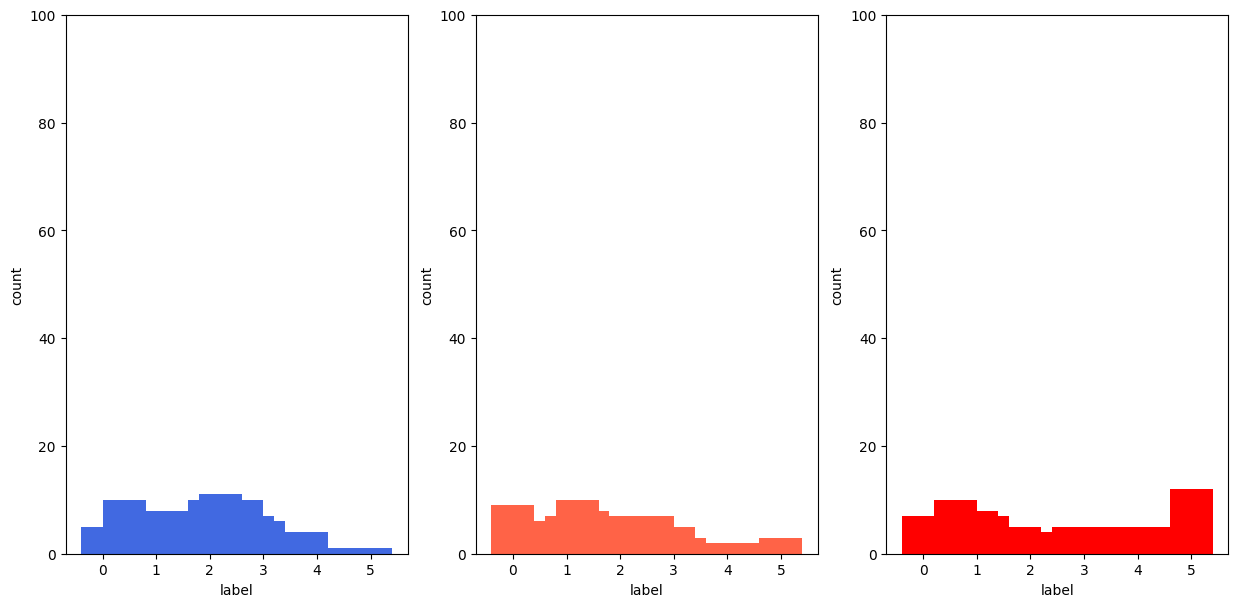

In [83]:
val_data = pd.read_csv('data/dev.csv')
gb_source = val_data.groupby('source')['label'].value_counts()
fig, axes = plt.subplots(1, 3, figsize=(15, 7))
axes[0].bar(gb_source['nsmc-sampled'].index, gb_source['nsmc-sampled'], color='royalblue')
axes[1].bar(gb_source['slack-sampled'].index, gb_source['slack-sampled'], color='tomato')
axes[2].bar(gb_source['petition-sampled'].index, gb_source['petition-sampled'], color='red')
for ax in axes:
    ax.set_ylim(0,100)
    ax.set_xlabel('label')
    ax.set_ylabel('count')
plt.show()

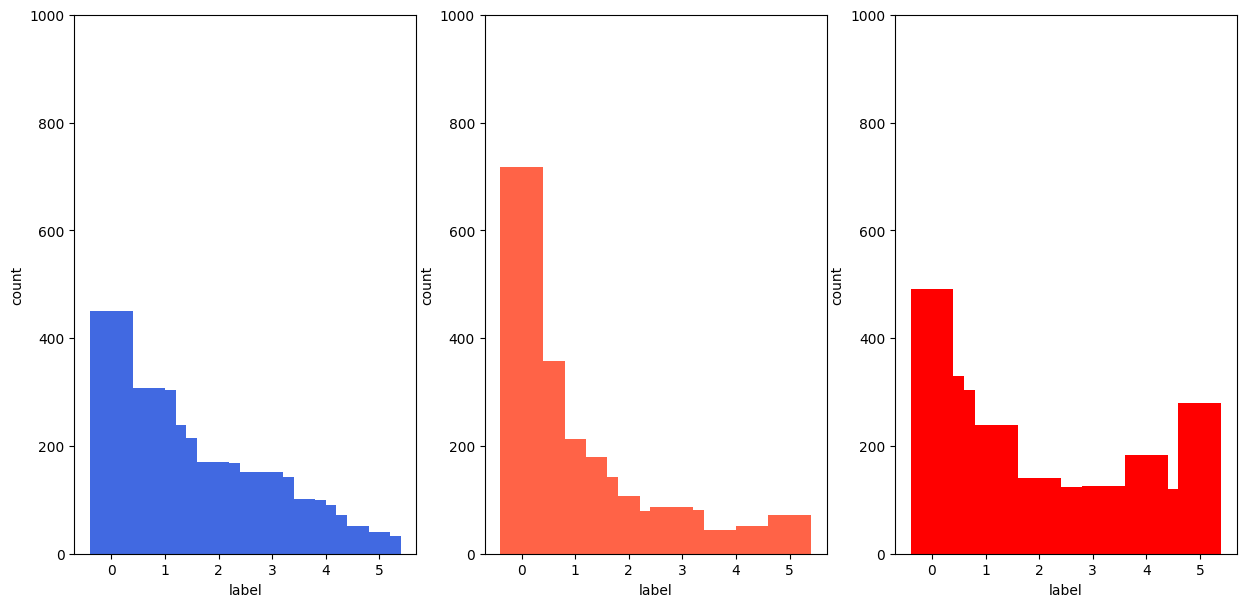

In [85]:
new_data = pd.read_csv('data/train_resampled_swap.csv')
new_data.sample(10)
gb_source = new_data.groupby('source')['label'].value_counts()
fig, axes = plt.subplots(1, 3, figsize=(15, 7))
axes[0].bar(gb_source['nsmc-sampled'].index, gb_source['nsmc-sampled'], color='royalblue')
axes[1].bar(gb_source['slack-sampled'].index, gb_source['slack-sampled'], color='tomato')
axes[2].bar(gb_source['petition-sampled'].index, gb_source['petition-sampled'], color='red')
for ax in axes:
    ax.set_ylim(0,1000)
    ax.set_xlabel('label')
    ax.set_ylabel('count')
plt.show()